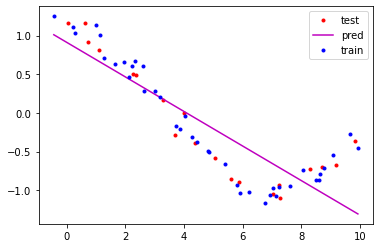

[[-0.2233499]
 [ 0.9134779]]


In [1]:
'''
Illustrates a simple regression task on 
simulated data. 

Trying to find polynomial approximations 
to a sinusoid

It gives an idea how 
non linear regression works

/home/splab-ece/deepl/nonlinear.ipynb

'''

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


def Error(y,pred):
    return np.mean(np.square(y-pred))


def SimulData():
        # Simulate some data for training 
        x_train = np.arange(0,10, 0.25 )
        x_train = x_train + 1.0/3.0 * np.random.randn(x_train.size);
        y_train  = np.cos( x_train  * np.pi /7) +  0.1 * np.random.randn(x_train.size);

        x_test = np.arange(0,10, 0.5 )
        x_test = x_test + 1.0/3.0 * np.random.randn(x_test.size);
        y_test  = np.cos( x_test  * np.pi /7)+  0.1 * np.random.randn(x_test.size)

        return (x_train,y_train) , (x_test, y_test)

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = SimulData();
xs = np.arange( np.min(x_train), np.max(x_train),0.01 )


#    Line Model 
x_t1 = np.vstack((x_train,np.ones(x_train.shape))).T;
y_t1 = np.zeros((x_train.shape[0],1))
y_t1 = y_train

a=np.zeros((2,1))
a = (np.dot(np.linalg.inv( np.dot(x_t1.T, x_t1) ), np.dot(x_t1.T,y_t1))).reshape(a.shape[0],1)
ys = xs * a[0] + a[1]; 

tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,ys,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

#Evaluate the Test Error (Mean Square ERROR - MSE)

plt.legend()
plt.show()
print(a)
#print("Error in Linear model",Error(y_test, np.dot(a.T,x_test)))

# TRY TO FIT HIGHER ORDER MODELS 
# y = a0 + a1 x + a2 x^2  + ... + am x^m
#  FOR MODEL ORDER m = 1,2,3,4,5


# Plot the Test MSE vs model order 

In [2]:
#Evaluate the Test Error (Mean Square ERROR - MSE)
MSE =[]
x_test1 = np.vstack((x_test,np.ones(x_test.shape))).T
print("Mean Square Error on train data for Linear Model is:",Error(y_t1.reshape(y_t1.shape[0],1),np.dot(x_t1,a)))
print("Mean Square Error on test data for Linear Model is: ",Error(y_test.reshape(y_test.shape[0],1),np.dot(x_test1,a)))
MSE.append(Error(y_test.reshape(y_test.shape[0],1),np.dot(x_test1,a)))

Mean Square Error on train data for Linear Model is: 0.13429554069291177
Mean Square Error on test data for Linear Model is:  0.13664244916675294


**model with polynomial of degree 2.**

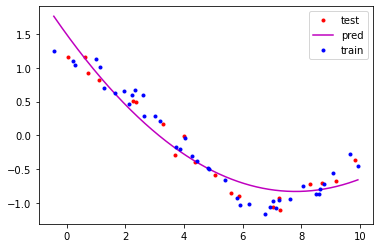

[[ 1.49362455]
 [-0.59443379]
 [ 0.03807   ]]


In [5]:
# y = a0 + a1 x + a2 x^2
degree = 2
X_t2 = np.ones((x_train.shape[0], 2))
X_t2[:, 0] = x_train
X_t2[:, 1] = x_train**2

Y_t2 = y_train.reshape((x_train.shape[0], 1))

X_test2 = np.ones((x_test.shape[0], 2))
X_test2[:, 0] = x_test
X_test2[:, 1] = x_test**2

Y_test2 = y_test.reshape((x_test.shape[0], 1))
X_t2 =  np.hstack((np.ones((X_t2.shape[0],1)), X_t2))
X_test2 =  np.hstack((np.ones((X_test2.shape[0],1)), X_test2))

a_dash = np.zeros((3,1))
a_dash = np.dot(np.linalg.inv(np.dot(X_t2.T, X_t2)), np.dot(X_t2.T,Y_t2))

XS = np.ones((xs.shape[0], 2))
XS[:, 0] = xs
XS[:, 1] = xs**2
XS =  np.hstack((np.ones((XS.shape[0],1)), XS))

y_pred2 = np.dot(XS, a_dash)


tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,y_pred2,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

#Evaluate the Test Error (Mean Square ERROR - MSE)

plt.legend()
plt.show()
print(a_dash)


In [9]:
#Evaluate the Test Error (Mean Square ERROR - MSE)
print("Mean Square Error on train data for Linear Model is:",Error(Y_t2.reshape(Y_t2.shape[0],1),np.dot(X_t2,a_dash)))
print("Mean Square Error for Degree 2 Model is: ",Error(y_test.reshape(y_test.shape[0],1),np.dot(X_test2,a_dash)))
MSE.append(Error(y_test.reshape(y_test.shape[0],1),np.dot(X_test2,a_dash)))

Mean Square Error on train data for Linear Model is: 0.04828838984944362
Mean Square Error for Degree 2 Model is:  0.03383046821862386


**model with polynomial of degree 3.**

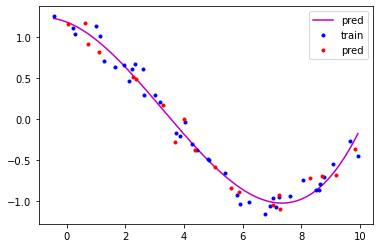

[[ 1.1797112 ]
 [-0.13839606]
 [-0.08508432]
 [ 0.00858137]]


In [10]:
# y = a0 + a1 x + a2 x^2 + a3 x^3
# degree = 3
X_t3 = np.ones((x_train.shape[0], 3))
X_t3[:, 0] = x_train
X_t3[:, 1] = x_train**2
X_t3[:, 2] = x_train**3

Y_t3 = y_train.reshape((x_train.shape[0], 1))

X_test3 = np.ones((x_test.shape[0], 3))
X_test3[:, 0] = x_test
X_test3[:, 1] = x_test**2
X_test3[:, 2] = x_test**3


Y_test3 = y_test.reshape((x_test.shape[0], 1))
X_t3 =  np.hstack((np.ones((X_t3.shape[0],1)), X_t3))
X_test3 =  np.hstack((np.ones((X_test3.shape[0],1)), X_test3))

a_3 = np.zeros((4,1))
a_3 = np.dot(np.linalg.inv(np.dot(X_t3.T, X_t3)), np.dot(X_t3.T,Y_t3))

XS3 = np.ones((xs.shape[0], 3))
XS3[:, 0] = xs
XS3[:, 1] = xs**2
XS3[:, 2] = xs**3
XS3 =  np.hstack((np.ones((XS3.shape[0],1)), XS3))

y_pred3 = np.dot(XS3, a_3)


#tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,y_pred3,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');
ts = plt.plot(x_test,y_test, 'r.', label='pred')

#Evaluate the Test Error (Mean Square ERROR - MSE)

plt.legend()
plt.show()
print(a_3)

In [11]:
#Evaluate the Test Error (Mean Square ERROR - MSE)
print("Mean Square Error on train data for Linear Model is:",Error(Y_t3.reshape(Y_t3.shape[0],1),np.dot(X_t3,a_3)))
print("Mean Square Error for Degree 3 Model is: ",Error(y_test.reshape(y_test.shape[0],1),np.dot(X_test3,a_3)))
MSE.append(Error(y_test.reshape(y_test.shape[0],1),np.dot(X_test3,a_3)))

Mean Square Error on train data for Linear Model is: 0.012690926716346904
Mean Square Error for Degree 3 Model is:  0.011331263815778642


**model with polynomial of degree 4.**

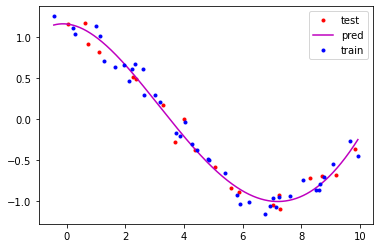

[[ 1.15562465e+00]
 [-3.60784864e-02]
 [-1.40406763e-01]
 [ 1.79274144e-02]
 [-4.89585800e-04]]


In [13]:
# y = a0 + a1 x + a2 x^2 + a3 x^3 + a4 x^4
# degree = 4
X_t4 = np.ones((x_train.shape[0], 4))
X_t4[:, 0] = x_train
X_t4[:, 1] = x_train**2
X_t4[:, 2] = x_train**3
X_t4[:, 3] = x_train**4

Y_t4 = y_train.reshape((x_train.shape[0], 1))

X_test4 = np.ones((x_test.shape[0], 4))
X_test4[:, 0] = x_test
X_test4[:, 1] = x_test**2
X_test4[:, 2] = x_test**3
X_test4[:, 3] = x_test**4


Y_test4 = y_test.reshape((x_test.shape[0], 1))
X_t4 =  np.hstack((np.ones((X_t4.shape[0],1)), X_t4))
X_test4 =  np.hstack((np.ones((X_test4.shape[0],1)), X_test4))

a_4 = np.zeros((5,1))
a_4 = np.dot(np.linalg.inv(np.dot(X_t4.T, X_t4)), np.dot(X_t4.T,Y_t4))

XS4 = np.ones((xs.shape[0], 4))
XS4[:, 0] = xs
XS4[:, 1] = xs**2
XS4[:, 2] = xs**3
XS4[:, 3] = xs**4
XS4 =  np.hstack((np.ones((XS4.shape[0],1)), XS4))

y_pred4 = np.dot(XS4, a_4)


tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,y_pred4,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

#Evaluate the Test Error (Mean Square ERROR - MSE)

plt.legend()
plt.show()
print(a_4)

In [15]:
#Evaluate the Test Error (Mean Square ERROR - MSE)
print("Mean Square Error on train data for Linear Model is:",Error(Y_t4,np.dot(X_t4,a_4)))
print("Mean Square Error for Degree 4 Model is: ",Error(y_test.reshape(y_test.shape[0],1),np.dot(X_test4,a_4)))
MSE.append(Error(y_test.reshape(y_test.shape[0],1),np.dot(X_test4,a_4)))

Mean Square Error on train data for Linear Model is: 0.011831978734059471
Mean Square Error for Degree 4 Model is:  0.010459919703852256


**model with polynomial of degree 5.**

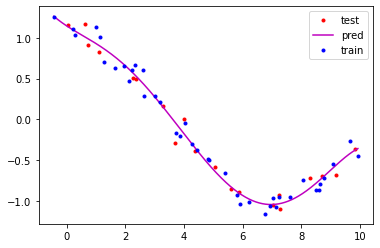

[[ 1.14523064e+00]
 [-2.36184558e-01]
 [ 5.52442673e-02]
 [-4.18310008e-02]
 [ 6.74373517e-03]
 [-3.02604529e-04]]


In [17]:
# y = a0 + a1 x + a2 x^2 + a3 x^3 + a4 x^4 + a^5
# degree = 5
X_t5 = np.ones((x_train.shape[0], 5))
X_t5[:, 0] = x_train
X_t5[:, 1] = x_train**2
X_t5[:, 2] = x_train**3
X_t5[:, 3] = x_train**4
X_t5[:, 4] = x_train**5

Y_t5 = y_train.reshape((x_train.shape[0], 1))

X_test5 = np.ones((x_test.shape[0], 5))
X_test5[:, 0] = x_test
X_test5[:, 1] = x_test**2
X_test5[:, 2] = x_test**3
X_test5[:, 3] = x_test**4
X_test5[:, 4] = x_test**5

Y_test5 = y_test.reshape((x_test.shape[0], 1))
X_t5 =  np.hstack((np.ones((X_t5.shape[0],1)), X_t5))
X_test5 =  np.hstack((np.ones((X_test5.shape[0],1)), X_test5))

a_5 = np.zeros((6,1))
a_5 = np.dot(np.linalg.inv(np.dot(X_t5.T, X_t5)), np.dot(X_t5.T,Y_t5))

XS5 = np.ones((xs.shape[0], 5))
XS5[:, 0] = xs
XS5[:, 1] = xs**2
XS5[:, 2] = xs**3
XS5[:, 3] = xs**4
XS5[:, 4] = xs**5
XS5 =  np.hstack((np.ones((XS5.shape[0],1)), XS5))

y_pred5 = np.dot(XS5, a_5)


tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,y_pred5,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

#Evaluate the Test Error (Mean Square ERROR - MSE)

plt.legend()
plt.show()
print(a_5)

In [18]:
#Evaluate the Test Error (Mean Square ERROR - MSE)
print("Mean Square Error on train data for Linear Model is:",Error(Y_t5,np.dot(X_t5,a_5)))
print("Mean Square Error for Degree 5 Model is: ",Error(y_test.reshape(y_test.shape[0],1),np.dot(X_test5,a_5)))
MSE.append(Error(y_test.reshape(y_test.shape[0],1),np.dot(X_test5,a_5)))

Mean Square Error on train data for Linear Model is: 0.00946604418329692
Mean Square Error for Degree 5 Model is:  0.009155139211990241


**Plot of MSE vs Degree of Hypothesis**

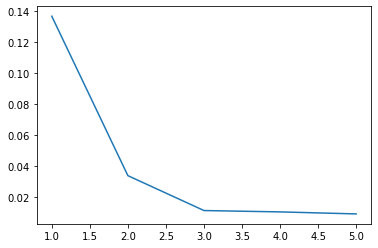

In [20]:
Degrees=[1,2,3,4,5]
plt.plot(Degrees, MSE,label='MSE vs Degree')
plt.show()